<a href="https://colab.research.google.com/github/RAdvaithVIT/Deep-Learning-Codes/blob/main/CNN_with_Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

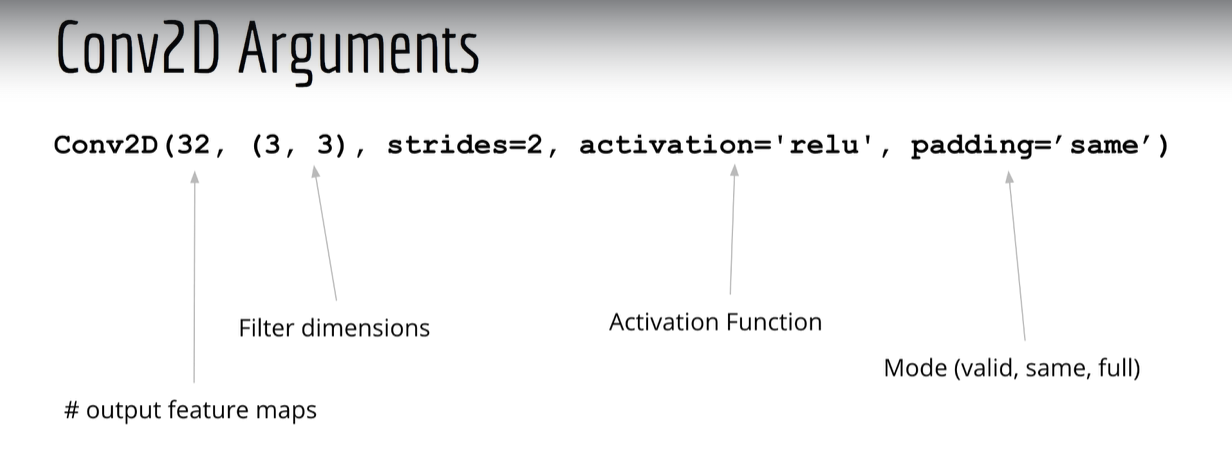

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

In [3]:
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.models import Model

In [4]:
fashion_mnist=tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test)=fashion_mnist.load_data()
x_train,x_test = x_train/255.0, x_test/255.0
print(x_train.shape)

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
(60000, 28, 28)


In [5]:
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print(x_train.shape)

(60000, 28, 28, 1)


In [6]:
#setting number of classes

K=len(set(y_train))
print("number of classes: ", K)

number of classes:  10


In [13]:
#building the model using keras functional API

i=Input(shape=x_train[0].shape)
x=Conv2D(32, (3,3), strides=2, activation="relu")(i)
x=Conv2D(64, (3,3), strides=2, activation="relu")(x)
x=Conv2D(128, (3,3), strides=2, activation="relu")(x)
x=Flatten()(x)
x=Dropout(0.2)(x)
x=Dense(512, activation="relu")(x)
x=Dropout(0.2)(x)
x=Dense(K, activation="softmax")(x)

model = Model(i,x)

In [10]:
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=['accuracy'])
r=model.fit(x_train,y_train,validation_data=(x_test,y_test), epochs=15)

Epoch 1/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 35s 18ms/step - accuracy: 0.7471 - loss: 0.6986 - val_accuracy: 0.8493 - val_loss: 0.4034
Epoch 2/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 17ms/step - accuracy: 0.8553 - loss: 0.3815 - val_accuracy: 0.8712 - val_loss: 0.3551
Epoch 3/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 17ms/step - accuracy: 0.8760 - loss: 0.3265 - val_accuracy: 0.8768 - val_loss: 0.3370
Epoch 4/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 42s 18ms/step - accuracy: 0.8915 - loss: 0.2844 - val_accuracy: 0.8770 - val_loss: 0.3252
Epoch 5/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 31s 16ms/step - accuracy: 0.9007 - loss: 0.2600 - val_accuracy: 0.8899 - val_loss: 0.3048
Epoch 6/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 55s 29ms/step - accuracy: 0.9115 - loss: 0.2313 - val_accuracy: 0.8881 - val_loss: 0.3101
Epoch 7/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 34s 18ms/step - accuracy: 0.9168 - loss: 0.2180 - val_accuracy: 0.8935 - val_loss: 0.3096
Epoch 8/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 38s 17ms/step - accuracy: 0.9253 -

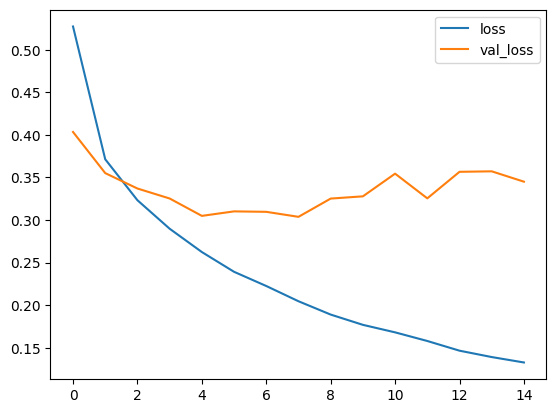

In [11]:
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()

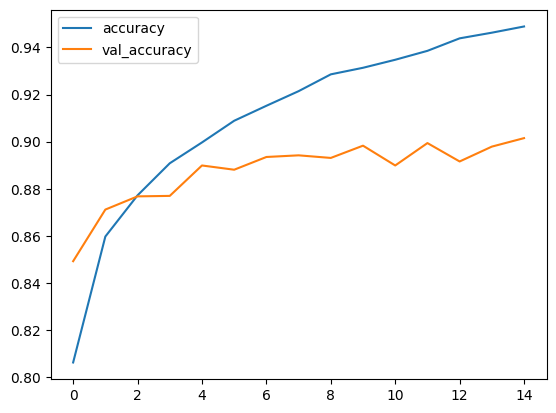

In [12]:
plt.plot(r.history['accuracy'],label='accuracy')
plt.plot(r.history['val_accuracy'],label='val_accuracy')
plt.legend()